In [186]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report

In [187]:
current_dir = os.getcwd()
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
path_file = os.path.join(current_dir, "datasets/iris.data")
data = pd.read_csv(path_file, header=None, names=column_names)

In [188]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [190]:
# X = data.drop(['sepal_length', 'sepal_width', 'species'], axis=1)
X = data.drop('species', axis=1)
y = data['species']

In [191]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [192]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [193]:
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [194]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [196]:
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [197]:
y_pred = classifier.predict(X_test)

In [198]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


In [199]:
mse = mean_squared_error(y_test, y_pred)
print('Erro quadratico medio (MSE): ', mse)

Erro quadratico medio (MSE):  0.0


In [200]:
mae = mean_absolute_error(y_test, y_pred)
print('Erro absoluto medio (MAE): ', mae)

Erro absoluto medio (MAE):  0.0


In [201]:
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia (Decision Tree):', accuracy)

Acurácia (Decision Tree): 1.0


In [202]:
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



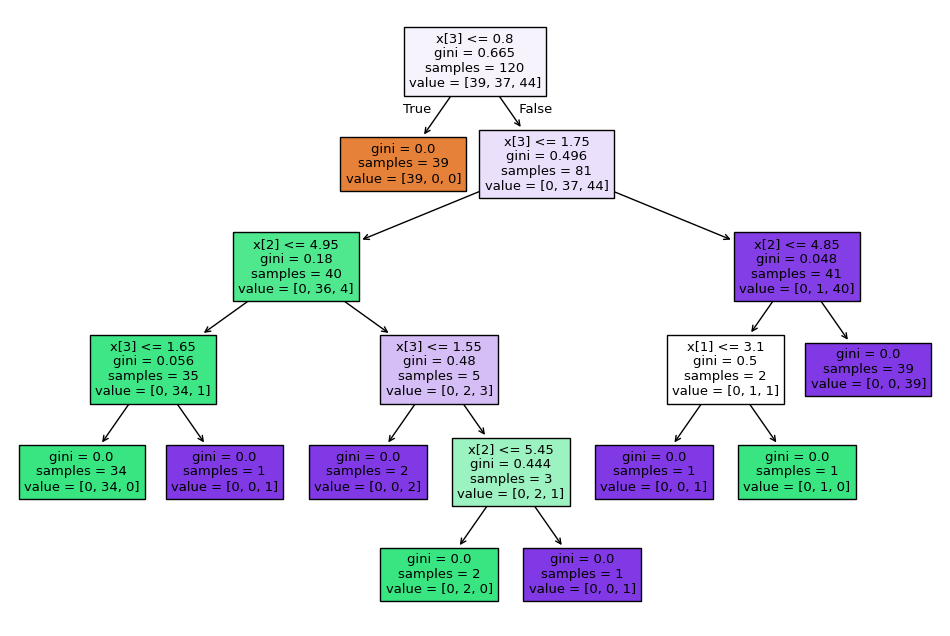

In [203]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(classifier, filled = True)
plt.show()